<a href="https://colab.research.google.com/github/arielle00/CMPE257-Fall23-Arielle-Shnayder/blob/main/take_home.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import pprint
import json
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


df_train = pd.read_csv('synthetic_dataset.csv')
df_val = pd.read_csv('synthetic_test_dataset.csv')

x_train = df_train[['x1', 'x2']]
y_train = df_train['y']

x_val = df_val[['x1', 'x2']]
y_val = df_val['y']

print(df_train.shape)
print(df_val.shape)

(50, 3)
(500, 3)


In [27]:
degrees = [1, 2, 3, 4]
errors = {'degree': [], 'train_error': [], 'val_error': []}

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(x_train)
    X_val_poly = poly.transform(x_val)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_val, y_val_pred)

    errors['degree'].append(degree)
    errors['train_error'].append(train_error)
    errors['val_error'].append(val_error)

for i in range(len(errors['degree'])):
    print(f"Degree: {errors['degree'][i]}, Training Error: {errors['train_error'][i]}, Validation Error: {errors['val_error'][i]}")

Degree: 1, Training Error: 0.8669392995099426, Validation Error: 0.8440180255525042
Degree: 2, Training Error: 0.6712559029286338, Validation Error: 0.752793662214335
Degree: 3, Training Error: 0.2536236701886392, Validation Error: 0.6867549907072039
Degree: 4, Training Error: 0.1737045044469892, Validation Error: 0.5697646871091975


Task 1 - Step 3

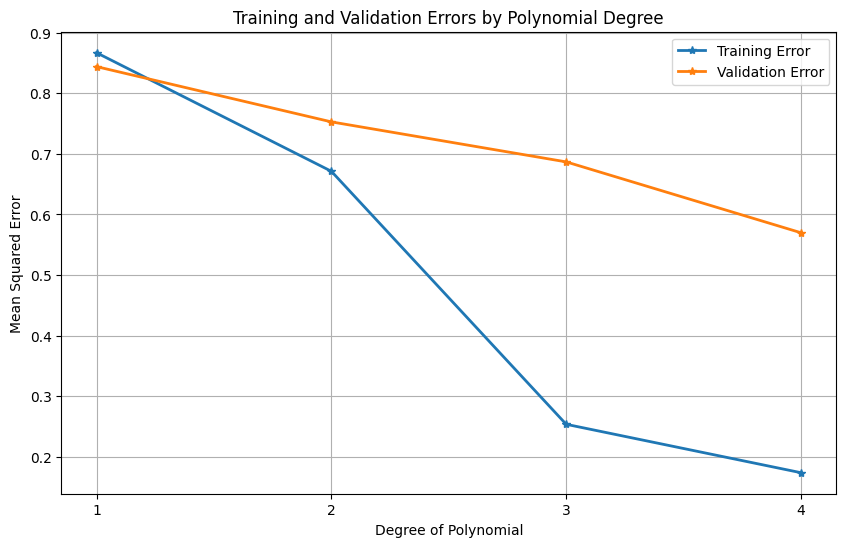

In [28]:
degrees = errors['degree']
train_errors = errors['train_error']
val_errors = errors['val_error']

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error', marker='*', linewidth=2)
plt.plot(degrees, val_errors, label='Validation Error', marker='*', linewidth=2)
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Errors by Polynomial Degree')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()

Task 1 - Step 4
- Some patterns I observe was that a linear model has high training and validation error which I think shows underfitting. I would choose 4th degree polynomial because both the training error and validation error are lowest.

TASK 2

In [29]:
df_train = pd.read_csv('breast_cancer_dataset_preprocessed.csv')

y = np.where(df_train.iloc[:, -1] == "M", 1, -1)
X = df_train.iloc[:, :-1]

#student id: 012002744
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=744)


In [30]:
neural_network =  MLPClassifier()
parameters = {}
model_nn = GridSearchCV(neural_network, parameters, cv=3, scoring='accuracy')
model_nn.fit(X_train, y_train)

best_model = model_nn.best_estimator_

y_pred = best_model.predict(X_test)
accuracy_nn = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy_nn}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.96875



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
def train_and_evaluate_svm(X, y, kernel_type, degree=None):
    if kernel_type == 'poly' and degree is not None:
        svm_model = SVC(kernel=kernel_type, degree=degree,C=1)
    else:
        svm_model = SVC(kernel=kernel_type,C=1)

    svm_model.fit(X, y)
    y_pred_train = svm_model.predict(X)
    train_error = 1 - accuracy_score(y, y_pred_train)

    return train_error

error_linear = train_and_evaluate_svm(X_train.iloc[:,:-1], y_train, 'linear')
error_poly = train_and_evaluate_svm(X_train.iloc[:,:-1], y_train, 'poly', degree=3)
error_rbf = train_and_evaluate_svm(X_train.iloc[:,:-1], y_train, 'rbf')

print("Training Error (Linear):", error_linear)
print("Training Error (Poly 3rd order):", error_poly)
print("Training Error (RBF):", error_rbf)


Training Error (Linear): 0.010526315789473717
Training Error (Poly 3rd order): 0.09122807017543855
Training Error (RBF): 0.024561403508771895


In [32]:
def calculate_in_sample_error(X, y, model):
    y_pred = model.predict(X)
    in_sample_error = 1 - accuracy_score(y, y_pred)
    return in_sample_error

def perform_cross_validation(X, y, kernel_type, c_values, degree=None):
    cv_scores = {}

    for c in c_values:
        if kernel_type == 'poly' and degree is not None:
            svm_model = SVC(kernel=kernel_type, degree=degree, C=c)
        else:
            svm_model = SVC(kernel=kernel_type, C=c)

        scores = cross_val_score(svm_model, X, y, cv=5)
        cv_scores[c] = 1 - np.mean(scores)

    return cv_scores

c_values = [0.01, 0.1, 1, 10, 100]

# Corrected function calls
cv_error_linear = perform_cross_validation(X_train, y_train, 'linear', c_values)
cv_error_poly = perform_cross_validation(X_train, y_train, 'poly', c_values, degree=3)
cv_error_rbf = perform_cross_validation(X_train, y_train, 'rbf', c_values)

print("CV Score (Linear):", cv_error_linear)
print("CV Score (Poly 3rd order):", cv_error_poly)
print("CV Score (RBF):", cv_error_rbf)

in_sample_errors_linear = {}
in_sample_errors_poly = {}
in_sample_errors_rbf = {}

for c in c_values:
    # Linear Kernel
    svm_linear = SVC(kernel='linear', C=c)
    svm_linear.fit(X_train, y_train)
    in_sample_errors_linear[c] = calculate_in_sample_error(X_train, y_train, svm_linear)

    # Polynomial Kernel
    svm_poly = SVC(kernel='poly', degree=3, C=c)
    svm_poly.fit(X_train, y_train)
    in_sample_errors_poly[c] = calculate_in_sample_error(X_train, y_train, svm_poly)

    # RBF Kernel
    svm_rbf = SVC(kernel='rbf', C=c)
    svm_rbf.fit(X_train, y_train)
    in_sample_errors_rbf[c] = calculate_in_sample_error(X_train, y_train, svm_rbf)

best_svm_model = SVC(kernel='linear', C=0.1)
best_svm_model.fit(X_train, y_train)
y_pred_train = best_svm_model.predict(X_train)
train_error = 1 - accuracy_score(y_train, y_pred_train)
print("Train error:", train_error)

y_pred_test = best_svm_model.predict(X_test)
test_error = 1 - accuracy_score(y_test, y_pred_test)
print("Test error:", test_error)

CV Score (Linear): {0.01: 0.03508771929824572, 0.1: 0.02807017543859658, 1: 0.0350877192982455, 10: 0.0350877192982455, 100: 0.0350877192982455}
CV Score (Poly 3rd order): {0.01: 0.2947368421052632, 0.1: 0.1859649122807019, 1: 0.1087719298245613, 10: 0.056140350877192935, 100: 0.06315789473684208}
CV Score (RBF): {0.01: 0.35789473684210527, 0.1: 0.06666666666666665, 1: 0.04210526315789487, 10: 0.042105263157894646, 100: 0.04561403508771933}
Train error: 0.024561403508771895
Test error: 0.03125


In [33]:
def check_for_misclassified(w, X, y):
  misclassified = []
  w = np.array(w)
  signs = np.sign(np.dot(X, w))
  # y = X_train.iloc[:, -1].values

  mismatches = np.where(signs != y)[0]
  return mismatches


Ein_pla=[]
def perceptron(X, y):
  w = [0,0,0,0,0,0,0,0]
  misclassified = check_for_misclassified(w, X, y)
  i=0

  while(len(misclassified)!=0 and i<1000):
    Ein_pla.append(len(misclassified)/len(y))
    list_of_misclass = random.choice(misclassified)
    x = X.iloc[list_of_misclass]
    y_misclass = y[list_of_misclass]

    w = w + x*y_misclass

    misclassified = check_for_misclassified(w, X, y)
    i=i+1
  print("PLA")
  print("Ein:",np.mean(Ein_pla))
  print("This is the final weight: ",w)
  return w

w = perceptron(X, y_train)
y_pred = np.sign(np.dot(X_test,w))

error_rate_test = np.mean(y_pred != y_test)
print(f"Error rate on test set: {error_rate_test:.4f}")

<ipython-input-33-33cac215cc2c>:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  mismatches = np.where(signs != y)[0]


PLA
Ein: 0.0035087719298245597
This is the final weight:  x1   -4147.954206
x2    4443.183482
x3      68.966344
x4   -4035.032867
x5    -817.574461
x6     476.277333
x7    -553.593336
x8   -1268.819494
Name: 0, dtype: float64
Error rate on test set: 0.9062


In [34]:
def pocketAlgo(misclassified_method, X, y, w_pocket):
  i=0
  Ein_list = []
  w_maybeNew = w_pocket
  misclassified_pocket = misclassified_method(w_pocket, X, y)

  while i<1000:
      list_of_misclass = random.choice(list(misclassified_pocket))
      Ein = len(misclassified_pocket)/len(y)
      Ein_list.append(Ein)

      x = X.iloc[list_of_misclass].values
      y_sample = y[list_of_misclass]

      w_maybeNew = w_pocket + x*y_sample

      misclassified_new = misclassified_method(w_maybeNew, X,y)

      if len(misclassified_new) <= len(misclassified_pocket):
          w_pocket = w_maybeNew
          misclassified_pocket = misclassified_new
      else:
        misclassified_pocket = misclassified_method(w_pocket, X,y)
      i=i+1

  print("POCKET Ein",np.mean(Ein_list))
  print("This is the final weight: ",w_pocket)
  return w_pocket

w_pocket = [0,0,0,0,0,0,0,0]
w_pocket = pocketAlgo(check_for_misclassified, X_train,y_train,w_pocket)


# X_test = X_train.iloc[:, :-1].values  # Extract input features
# y_test = X_train.iloc[:, -1].values   # Extract true labels

y_pred = np.sign(np.dot(X_test,w_pocket))

error_rate_test = np.mean(y_pred != y_test)
print(f"Error rate on test set: {error_rate_test:.4f}")


POCKET Ein 0.025845614035087727
This is the final weight:  [10.343517   -6.63450111 -1.65292078  0.2420465  -6.52950696 -1.75190648
 -1.60497147  2.33851718]
Error rate on test set: 0.0521


Include a detailed description of the methodology you used, the best performing model based on your
experiments, why you chose it, and the performance metrics you used to evaluate your models

Test Error:
- NN = 0.03125 = 3.13%
- Pocket: 0.0208 = 2.08%
- PLA: 0.9062 = 9.06%
- SVM: 0.03125 = 3.13%

The best model I got was pocket with an error of 2.08% or an accuracy of 97.92%. I also Have implemented a neural network, PLA, and SVM. I tried doing linear, rbf and polynomial for SVM but the best accuracy I got was with the linear model. Second best was the multi layer perceptron (NN) and SVM linear with c=0.1 at 96.87% accuracy.
